In [12]:
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import folium
from shapely.geometry import Point
pd.options.display.max_columns = 25


In [2]:
ciudades_estacion_ave = "Burgos, Guadalajara, Palencia, Girona, Figueres, Badajoz, Mérida, Albacete, Alacant/Alicante, Antequera, Barcelona, Calatayud, Ciudad Real, Córdoba, Cuenca, León, Lleida, Madrid, Málaga, Murcia, Ourense, Plasencia, Puertollano, Segovia, Sevilla, Tarragona, Toledo, València, Valladolid, Villanueva de Córdoba, Villena, Zamora, Zaragoza, Elche, Granada, Murcia, Utiel".split(", ")

In [3]:
len(ciudades_estacion_ave)

37

In [4]:
provincias = gpd.read_file('lineas_limite.zip!SHP_ETRS89/recintos_provinciales_inspire_peninbal_etrs89')
#INSPIREID', 'COUNTRY', 'NATLEV', 'NATLEVNAME', 'NATCODE', 'NAMEUNIT', 'CODNUT1', 'CODNUT2', 'CODNUT3', 'geometry'
provincias = provincias.to_crs("+proj=cea EPSG:2062")
provincias['area'] = round(provincias.area/1000000,0)
provincias['latitud'] = provincias.centroid.map(lambda p: p.y)
#Mapa de coropletas: mapa temÃ¡tico con las Ã¡reas sombreadas de diferentes colores en funciÃ³n del valor de una columna
provincias = provincias.to_crs(crs=3395)
#LÃ­mites de las provincias


In [5]:
municipios = gpd.read_file('lineas_limite.zip!SHP_ETRS89/recintos_municipales_inspire_peninbal_etrs89')
municipios = municipios.to_crs("+proj=cea EPSG:2062")
municipios = municipios.to_crs(crs=3395)

In [6]:
municipios.columns

Index(['INSPIREID', 'COUNTRY', 'NATLEV', 'NATLEVNAME', 'NATCODE', 'NAMEUNIT',
       'CODNUT1', 'CODNUT2', 'CODNUT3', 'geometry'],
      dtype='object')

In [7]:
len(municipios[municipios.NAMEUNIT.isin(ciudades_estacion_ave)])

35

In [45]:
valencia = municipios[municipios["NAMEUNIT"].str.contains("Castelló de la Plana")]

In [47]:
valencia.centroid

6164    POINT (-4781.492 4838074.492)
dtype: geometry

In [9]:
valencia

,INSPIREID,COUNTRY,NATLEV,NATLEVNAME,NATCODE,NAMEUNIT,CODNUT1,CODNUT2,CODNUT3,geometry
600,ES.IGN.BDDAE.34024444006,ES,https://inspire.ec.europa.eu/codelist/Administ...,Municipio,34024444006,Alacón,ES2,ES24,ES242,"POLYGON ((-82838.564 4988650.603, -82917.524 4..."
3544,ES.IGN.BDDAE.34100303119,ES,https://inspire.ec.europa.eu/codelist/Administ...,Municipio,34100303119,Sant Joan d'Alacant,ES5,ES52,ES521,"POLYGON ((-50622.504 4608988.787, -50552.481 4..."
6019,ES.IGN.BDDAE.34100303014,ES,https://inspire.ec.europa.eu/codelist/Administ...,Municipio,34100303014,Alacant/Alicante,ES5,ES52,ES521,"POLYGON ((-71296.441 4601736.997, -71511.482 4..."
6020,ES.IGN.BDDAE.34100303014,ES,https://inspire.ec.europa.eu/codelist/Administ...,Municipio,34100303014,Alicante/Alacant,ES5,ES52,ES521,"MULTIPOLYGON (((-53069.383 4575815.443, -53045..."


In [13]:
codes = municipios.CODNUT3.unique()
codes.sort()
codes

array(['ES111', 'ES112', 'ES113', 'ES114', 'ES120', 'ES130', 'ES211',
       'ES212', 'ES213', 'ES220', 'ES230', 'ES241', 'ES242', 'ES243',
       'ES300', 'ES411', 'ES412', 'ES413', 'ES414', 'ES415', 'ES416',
       'ES417', 'ES418', 'ES419', 'ES421', 'ES422', 'ES423', 'ES424',
       'ES425', 'ES431', 'ES432', 'ES511', 'ES512', 'ES513', 'ES514',
       'ES521', 'ES522', 'ES523', 'ES531', 'ES532', 'ES533', 'ES611',
       'ES612', 'ES613', 'ES614', 'ES615', 'ES616', 'ES617', 'ES618',
       'ES620', 'ES630', 'ES640'], dtype=object)

In [14]:
municipios["distance"] = municipios.centroid.distance(valencia.centroid.values[0])

<Axes: >

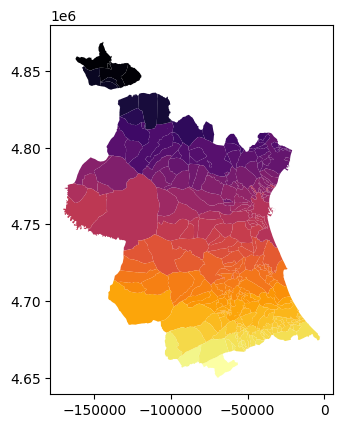

In [15]:
municipios[municipios["CODNUT3"]=="ES523"].plot(column="distance",cmap='inferno')

In [16]:
estaciones = gpd.read_file('RT_Espana_PorModos.zip!RT_FFCC/rt_estacionffcc_p.shp')
estaciones = estaciones.to_crs("+proj=cea EPSG:4326")
estaciones = estaciones.to_crs(crs=3395)

In [17]:
estaciones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3003 entries, 0 to 3002
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id_estfc    3003 non-null   int64   
 1   nombre      3003 non-null   object  
 2   tipo_estfc  3002 non-null   float64 
 3   tipo_estfD  2992 non-null   object  
 4   cod_est     3003 non-null   object  
 5   n_andenes   3003 non-null   int64   
 6   tipo_uso    3003 non-null   int64   
 7   tipo_usoD   3003 non-null   object  
 8   estadofis   3003 non-null   int64   
 9   estadofisD  3003 non-null   object  
 10  fecha_alta  3003 non-null   object  
 11  geometry    3003 non-null   geometry
dtypes: float64(1), geometry(1), int64(4), object(6)
memory usage: 281.7+ KB


In [18]:
estaciones[(estaciones.tipo_usoD == "Pasajeros") & (estaciones.nombre.str.contains("Estación de Valencia- Joaquin Sorolla"))]

,id_estfc,nombre,tipo_estfc,tipo_estfD,cod_est,n_andenes,tipo_uso,tipo_usoD,estadofis,estadofisD,fecha_alta,geometry
382,462500000068,Estación de Valencia- Joaquin Sorolla,3.0,Estación,03216,-997,1,Pasajeros,1,En uso,2018-02-18,POINT Z (-42497.521 4760619.099 12.636)


In [20]:
def contains_any(nombre:str,lista):
    for ciudad in lista:
        if ciudad in nombre:
            return True
    return False

In [21]:
estaciones[(estaciones.nombre.apply(lambda x: contains_any(x,ciudades_estacion_ave))) & (estaciones.tipo_usoD == "Pasajeros")& (estaciones.tipo_estfD == "Estación")]

,id_estfc,nombre,tipo_estfc,tipo_estfD,cod_est,n_andenes,tipo_uso,tipo_usoD,estadofis,estadofisD,fecha_alta,geometry
265,31400000004,Estación de Villena,3.0,Estación,60902,-997,1,Pasajeros,1,En uso,2018-02-18,POINT Z (-96591.478 4642388.128 501.923)
293,462490000001,Estación de Utiel,3.0,Estación,66200,-997,1,Pasajeros,1,En uso,2018-02-18,POINT Z (-133853.244 4776514.770 743.308)
392,462500000078,Estación de València-Sant Isidre,3.0,Estación,66212,-997,1,Pasajeros,1,En uso,2018-02-18,POINT Z (-45005.707 4759232.539 25.889)
410,462500000054,Estación de Fira València,3.0,Estación,VT-01,1,1,Pasajeros,1,En uso,2018-02-18,POINT Z (-47378.641 4766944.093 64.916)
432,31400000003,Estación de Villena,3.0,Estación,-997,-997,1,Pasajeros,3,Fuera de servicio,2018-02-18,POINT Z (-94045.204 4634281.247 492.706)
441,462130000003,Estación de Requena -Utiel,3.0,Estación,03213,-997,1,Pasajeros,1,En uso,2018-02-18,POINT Z (-126318.155 4769483.953 725.150)
532,462500000061,Estación de València-Cabanyal,3.0,Estación,65003,-997,1,Pasajeros,1,En uso,2018-02-18,POINT Z (-37254.667 4762068.169 3.628)
533,462500000075,Estación de València Sud,3.0,Estación,VT-00,5,1,Pasajeros,1,En uso,2018-02-18,POINT Z (-45749.198 4757861.256 21.847)
2602,462500000007,Estación de Estadi Ciutat de València,3.0,Estación,VT-018,2,1,Pasajeros,1,En uso,2018-02-18,POINT Z (-40646.246 4765646.834 11.866)
2821,300300000051,Senda de Granada,3.0,Estación,-997,1,1,Pasajeros,1,En uso,2023-02-15,POINT Z (-127039.361 4553539.821 0.000)


In [22]:
estaciones.tipo_usoD.unique()

array(['Pasajeros', 'Mixto', 'Desconocido', 'Mercancías'], dtype=object)

In [563]:
tramos = gpd.read_file('RT_Espana_PorModos.zip!RT_FFCC/rt_tramofc_linea.shp')
tramos = tramos.to_crs("+proj=cea EPSG:4326")

tramos = tramos.to_crs(crs=3395)
tramos.loc[tramos.nombre.str.contains('036'),"uso_ppalD"] = "Uso predominante Alta Velocidad"
tramos.loc[tramos.codigo.str.startswith('0360000'),"uso_ppalD"] = "Uso predominante Alta Velocidad"
tramos.loc[tramos.codigo.str.startswith('0440003'),"uso_ppalD"] = "Uso predominante Alta Velocidad"
tramos.loc[tramos.codigo.str.startswith('0440002'),"uso_ppalD"] = "Uso predominante Alta Velocidad"
tramos.loc[(tramos.codigo.str.contains("12C220010")),"nombre"] = "Ni idea hulio" 
tramos.loc[(tramos.codigo.str.contains("12C220010")),"uso_ppalD"] = "Otros usos" 
lineas_ave = tramos[tramos["uso_ppalD"] == "Uso predominante Alta Velocidad"].dissolve(by="nombre").reset_index()

In [12]:
tramos.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 50042 entries, 0 to 50041
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id_tramo    50042 non-null  float64 
 1   codigo      50042 non-null  object  
 2   tipo_tramo  50042 non-null  int64   
 3   tipotramoD  50042 non-null  object  
 4   ancho_via   50042 non-null  int64   
 5   ancho_viaD  50042 non-null  object  
 6   electrific  50042 non-null  int64   
 7   electrifiD  50042 non-null  object  
 8   estadofis   50042 non-null  int64   
 9   estadofisD  50042 non-null  object  
 10  n_vias      50042 non-null  int64   
 11  n_viasD     50042 non-null  object  
 12  situacion   50042 non-null  int64   
 13  situacionD  50042 non-null  object  
 14  red_tent    50042 non-null  int64   
 15  red_tentD   50042 non-null  object  
 16  uso_ppal    50042 non-null  int64   
 17  uso_ppalD   50042 non-null  object  
 18  titular     50042 non-null  int64   
 

In [47]:
tramos.tipo_lineD.unique()

array(['Tren', 'Tren ligero', 'Metro', 'Tranvía', 'Cremallera',
       'Funicular'], dtype=object)

<Axes: >

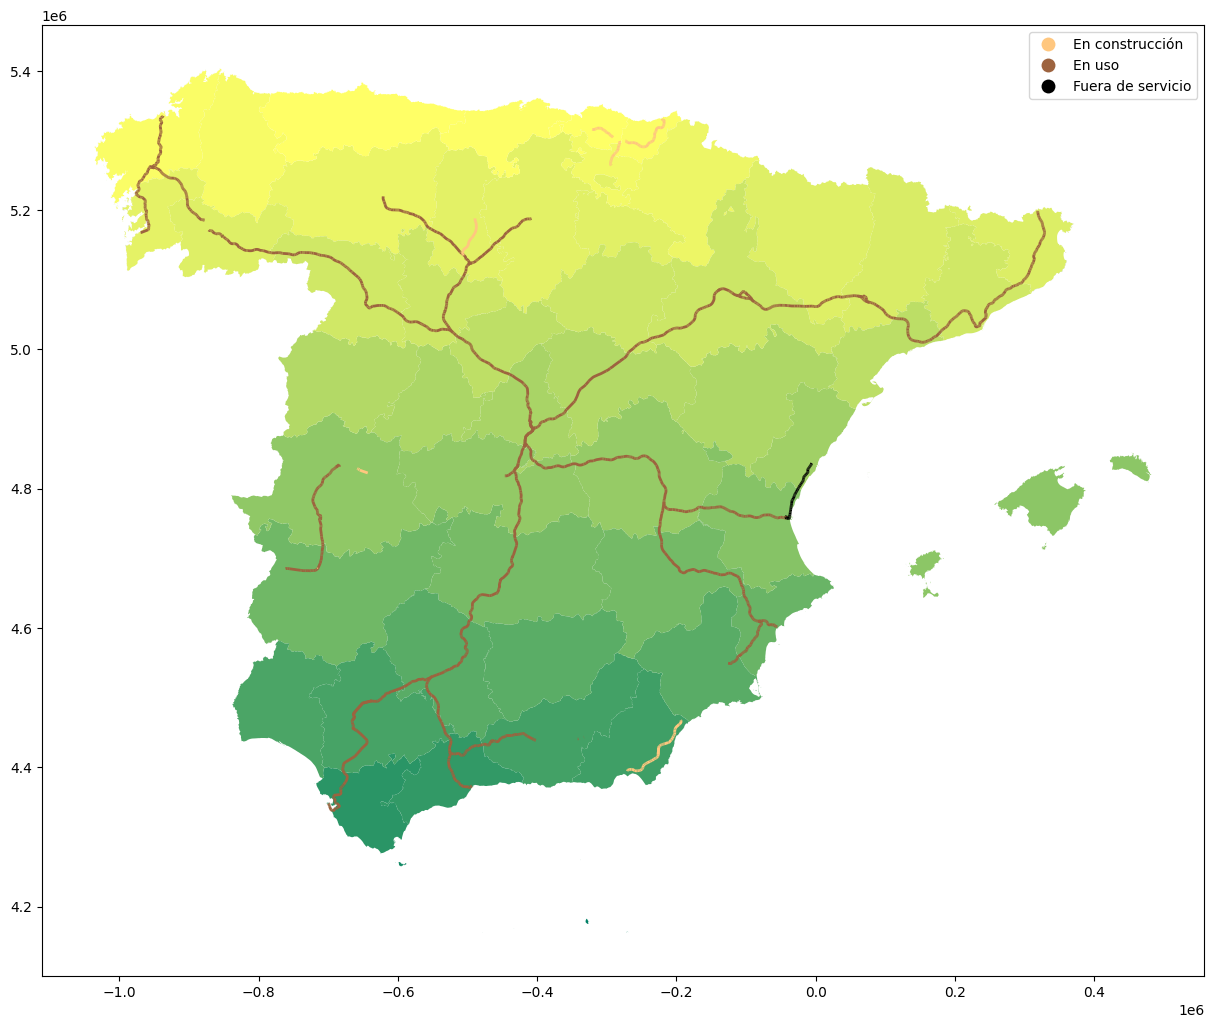

In [570]:
#ax = provincias.boundary.plot(figsize=(15, 15),color="black",linewidth=1)
ax = provincias.plot(figsize=(15,15),cmap="summer",column="latitud")

#tramos[(tramos["tipo_lineD"] == "Cremallera")].plot(ax = ax)
#tramos[(tramos["tipotramoD"] == "Troncal") & (tramos["uso_ppalD"] != "Uso predominante Alta Velocidad")].plot(ax = ax,color="blue")
lineas_ave.plot(ax = ax,linewidth=2,column="estadofisD",cmap="copper_r",legend=True)
#municipios[municipios.NAMEUNIT.isin(ciudades_estacion_ave)].centroid.plot(ax = ax,color="black")
#estaciones[(estaciones.nombre.apply(lambda x: contains_any(x,ciudades_estacion_ave))) & (estaciones.tipo_usoD == "Pasajeros")].plot(ax = ax, color = 'red')

<Axes: >

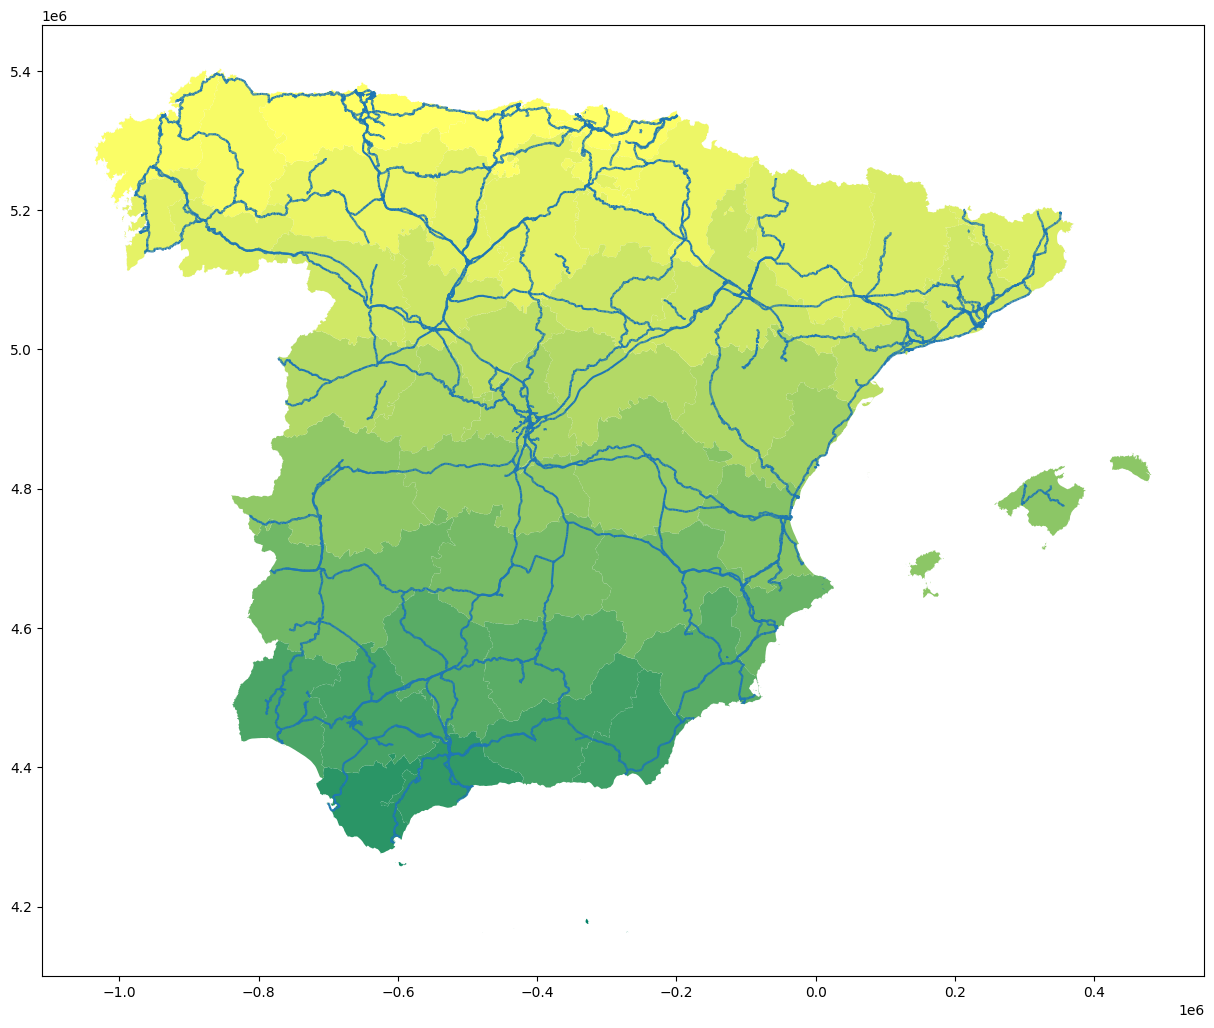

In [131]:
ax = provincias.plot(figsize=(15,15),cmap="summer",column="latitud")
tramos[tramos.tipo_lineD == "Tren"].plot(figsize=(15,15),ax=ax)

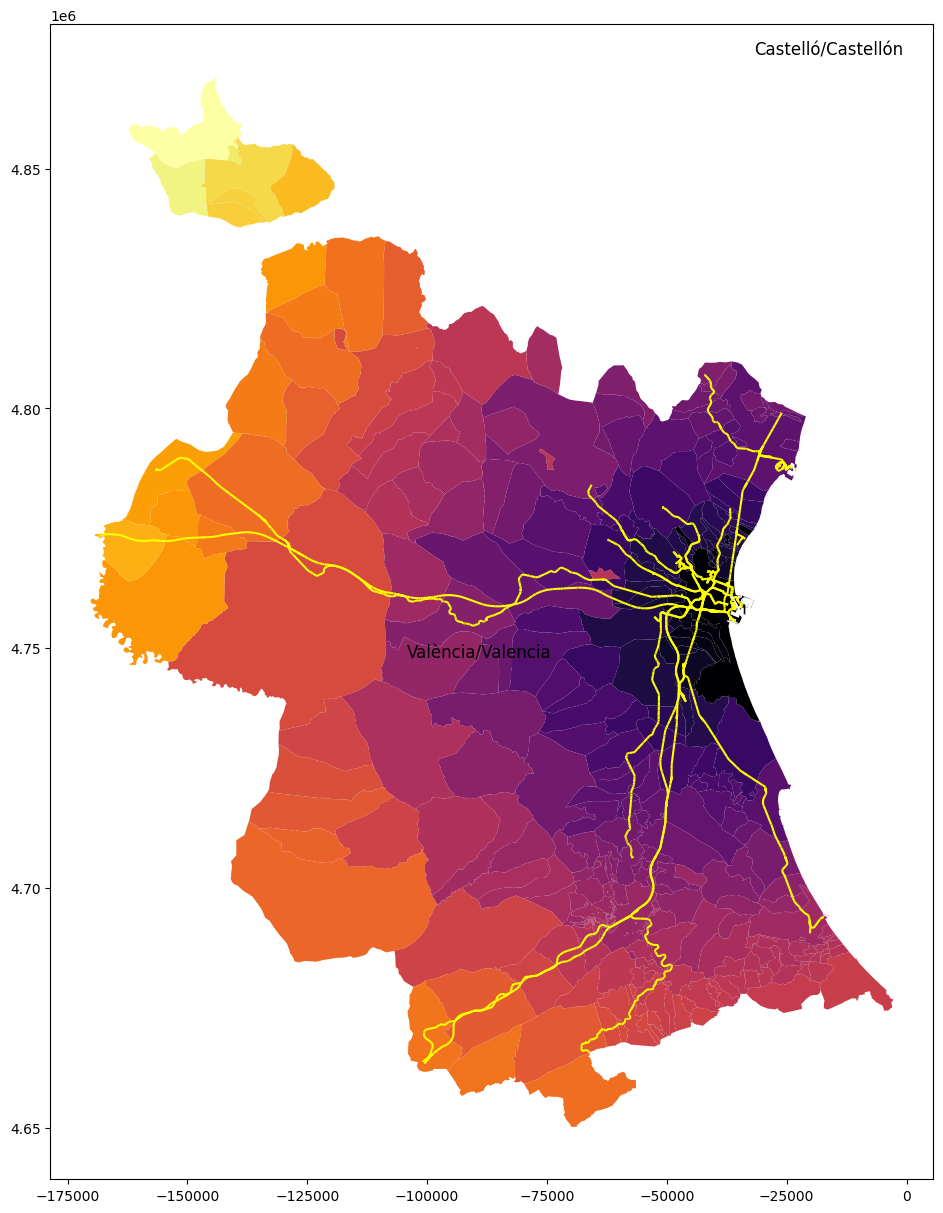

In [150]:
ax = municipios[municipios["CODNUT3"] == valencia["CODNUT3"].values[0]].plot(figsize=(15, 15),column="distance",cmap='inferno')
provincias.apply(lambda x: ax.annotate(text=x.NAMEUNIT,
    xy=x.geometry.centroid.coords[0], ha='center',
    fontsize=12) if 'Territorio' not in x.NAMEUNIT
    else ax.annotate(text='',
    xy=x.geometry.centroid.coords[0], ha='center',
    fontsize=12),axis=1)
#trenes.plot(ax=ax, color='red', markersize=0.5)
tramos.plot(ax=ax, color='yellow', markersize=0.5)
plt.show()

In [603]:
estaciones_excluir="""Estación de Vigo-
Estación de Ourense-Empalme-contenedores
Estación de Córdoba-El Higuerón
Estación de A Coruña-San Diego-contenedores
Estación de León-Clasificación
Estación de Puertollano-Refinería
Plasencia Jalón
Plasencia de Jalón
Plasencia del Monte
Estación de Badajoz-Frontera
Cargadero de Mérida-Contenedores
Apartadero de Casar de Cáceres
Estación de Girona-Mercaderies
Estación de Zaragoza-Delicias
Estación de La Sagrera""".split("\n")

In [610]:
estaciones_ave_nombres = """Estación de Albacete
Estación de Castelló de la Plana
Estación de Alacant-Terminal
Antequera-Santa Ana
Estación de Madrid-Puerta de Atocha
Barcelona-Sants
Calatayud
Estación de Camp de Tarragona
Clara Campoamor
Estación de Ciudad Real
Estación de Córdoba
Estación de A Coruña
Estación de Cuenca Fernando Zóbel
Elche
Vilafant
Girona
Estación de Granada
Guadalajara-Yebes
Estación de León
Lleida-Pirineus
Loja
Zambrano
Estación de Medina del Campo Alta Velocidad
Murcia del Carmen
Estación de Ourense-Empalme
Orihuela
Palencia
Estación de Pontevedra
Villanueva de Córdoba
Puente Genil-Herrera
Estación de Puertollano
Redondela
Requena -Utiel
Estación de Alta Velocidad de Sanabria
Santiago de Compostela
Estación de Segovia-A.V.
Sevilla-Santa Justa
Estación de Toledo
Sorolla
Valladolid-Campo Grande
Estación de Vigo
Estación de Villena Alta Velocidad
Zamora
Zaragoza-Delicias
Estación de La Sagrera
Badajoz
Mérida
Cáceres
Estación de Plasencia
Estación de Burgos Rosa Manzano""".split("\n")
print(len(estaciones_ave_nombres))

50


In [707]:
for nombre in estaciones_ave_nombres:
    print(f"{nombre:>50}: {len(estaciones[(estaciones.nombre.str.contains(nombre))&(~estaciones.nombre.apply(lambda x:contains_any(x,estaciones_excluir)))])}")

                              Estación de Albacete: 1
                  Estación de Castelló de la Plana: 1
                      Estación de Alacant-Terminal: 1
                               Antequera-Santa Ana: 1
               Estación de Madrid-Puerta de Atocha: 1
                                   Barcelona-Sants: 1
                                         Calatayud: 1
                     Estación de Camp de Tarragona: 1
                                   Clara Campoamor: 1
                           Estación de Ciudad Real: 1
                               Estación de Córdoba: 1
                              Estación de A Coruña: 1
                 Estación de Cuenca Fernando Zóbel: 1
                                             Elche: 1
                                          Vilafant: 1
                                            Girona: 1
                               Estación de Granada: 1
                                 Guadalajara-Yebes: 1
                            

In [640]:
estaciones[estaciones.nombre.str.contains("Redondela")]

,id_estfc,nombre,tipo_estfc,tipo_estfD,cod_est,n_andenes,tipo_uso,tipo_usoD,estadofis,estadofisD,fecha_alta,geometry
214,360450000164,Estación de Redondela,3.0,Estación,08224,-997,-997,Desconocido,1,En uso,2018-02-18,POINT Z (-957753.449 5174936.410 44.132)
1040,360450000149,Estación de Redondela,3.0,Estación,22300,-997,-997,Desconocido,1,En uso,2018-02-18,POINT Z (-959508.406 5175162.663 32.487)


In [651]:
id_redondela_redundante = 360450000149

In [652]:
gfd_estaciones_ave = estaciones[(estaciones.id_estfc != id_redondela_redundante)&(estaciones.nombre.apply(lambda x:contains_any(x,estaciones_ave_nombres))& (estaciones.nombre.apply(lambda x:not contains_any(x,estaciones_excluir))))]


In [657]:
anotaciones_derecha = """Antequera
Vigo
Utiel
Sanabria
Murcia
Elche
Sevilla
Badajoz
Pontevedra
Córdoba
Apartadero""".split("\n")

In [708]:
def sanear_nombre_estacion(nombre:str):
    palabras_redundantes = """Estación de 
Estacion de 
Alta Velocidad de
Alta Velocidad
-Puerta de Atocha
Camp de 
del Carmen
- Joaquin Sorolla
Villanueva de 
Fernanado Zóbel
Miguel Hernández
-Terminal
-Santa Justa
Apartadero de 
-A.V.
E.C.
Fernando Zóbel
-Pirineus
-Campo Grande
-Sants
 Rosa Manzano""".split("\n")
    for word in palabras_redundantes:
        nombre = nombre.replace(word,"")
    
    reemplazos_totales = {"Clara Campoamor":"Zaragoza","María-Zambrano":"Málaga"}
    if nombre in reemplazos_totales:
        nombre = reemplazos_totales[nombre]
    return nombre

(-1111300.3272436536, 557627.131437465, 4100388.9884980507, 5465854.634520683)

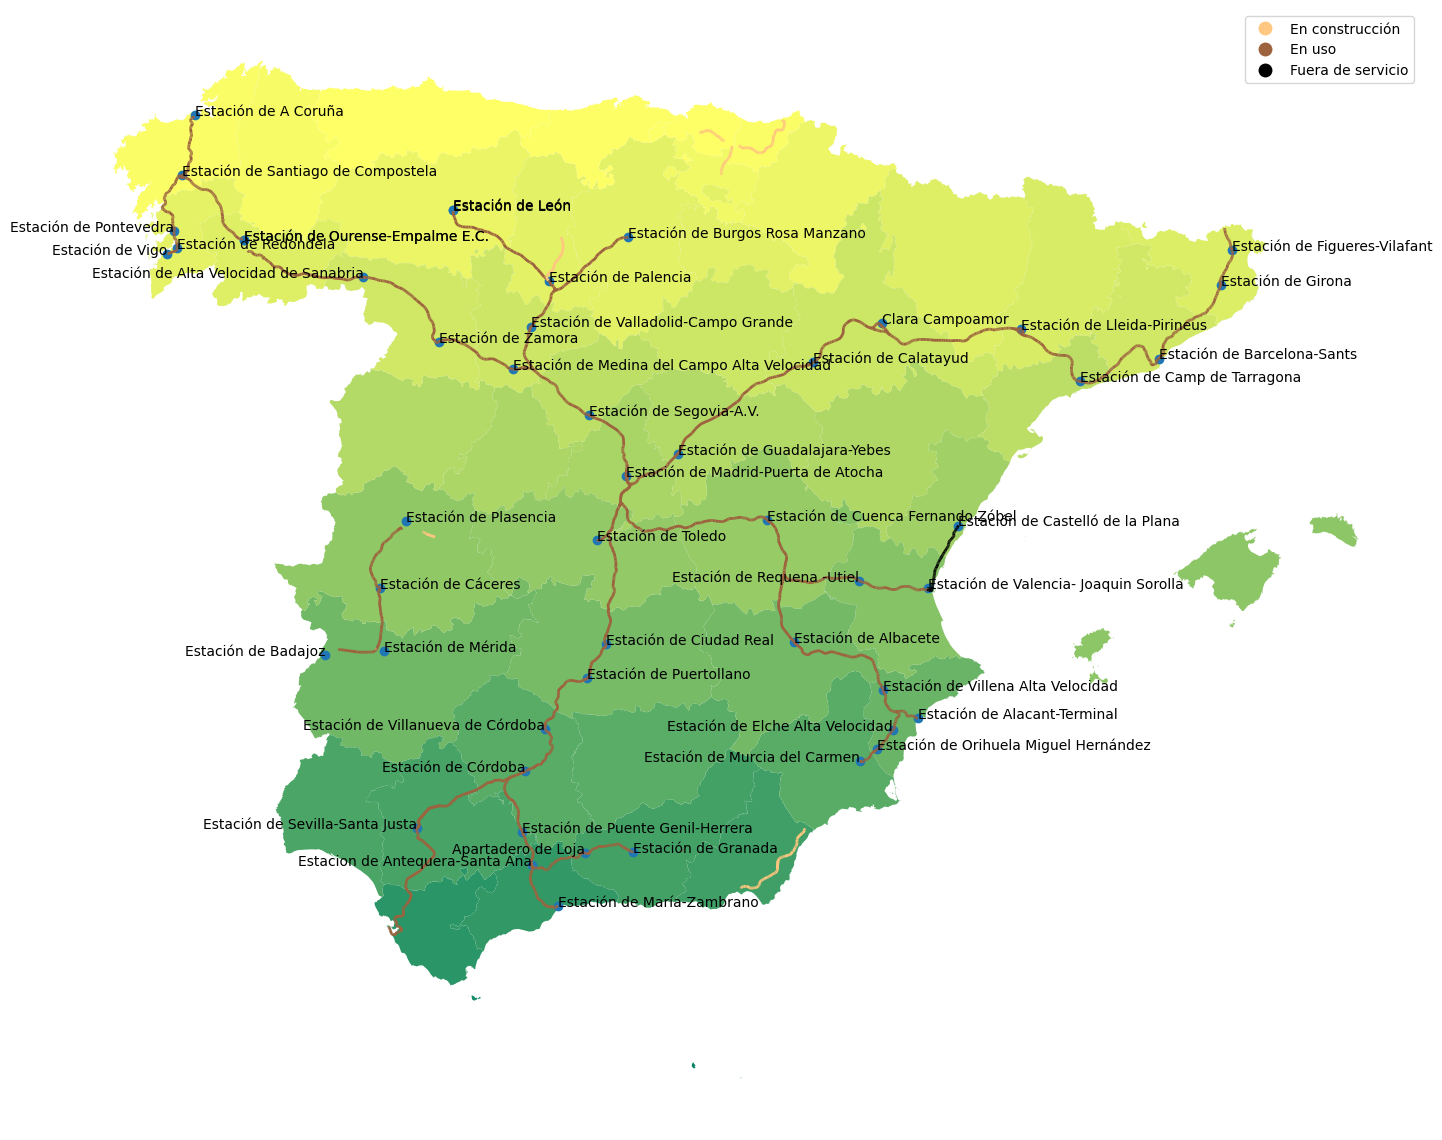

In [679]:
fig, (ax1) = plt.subplots(ncols=1,figsize=(15,15))
ax = provincias.plot(ax = ax1, figsize=(15,15),cmap="summer",column="latitud")
lineas_ave.plot(ax = ax,linewidth=2,column="estadofisD",cmap="copper_r",legend=True)
gfd_estaciones_ave.plot(ax = ax)
gfd_estaciones_ave[gfd_estaciones_ave["nombre"].apply(lambda x: contains_any(x,anotaciones_derecha))].apply(lambda x: ax.annotate(text=(x.nombre),
    xy=x.geometry.centroid.coords[0], ha='right',
    fontsize=10),axis=1)
gfd_estaciones_ave[gfd_estaciones_ave["nombre"].apply(lambda x: not contains_any(x,anotaciones_derecha))].apply(lambda x: ax.annotate(text=(x.nombre),
    xy=x.geometry.centroid.coords[0], ha='left',
    fontsize=10),axis=1)
fig.tight_layout()
plt.axis("off")

Text(0.5, 0.98, 'Líneas y estaciones de Alta Velocidad Española')

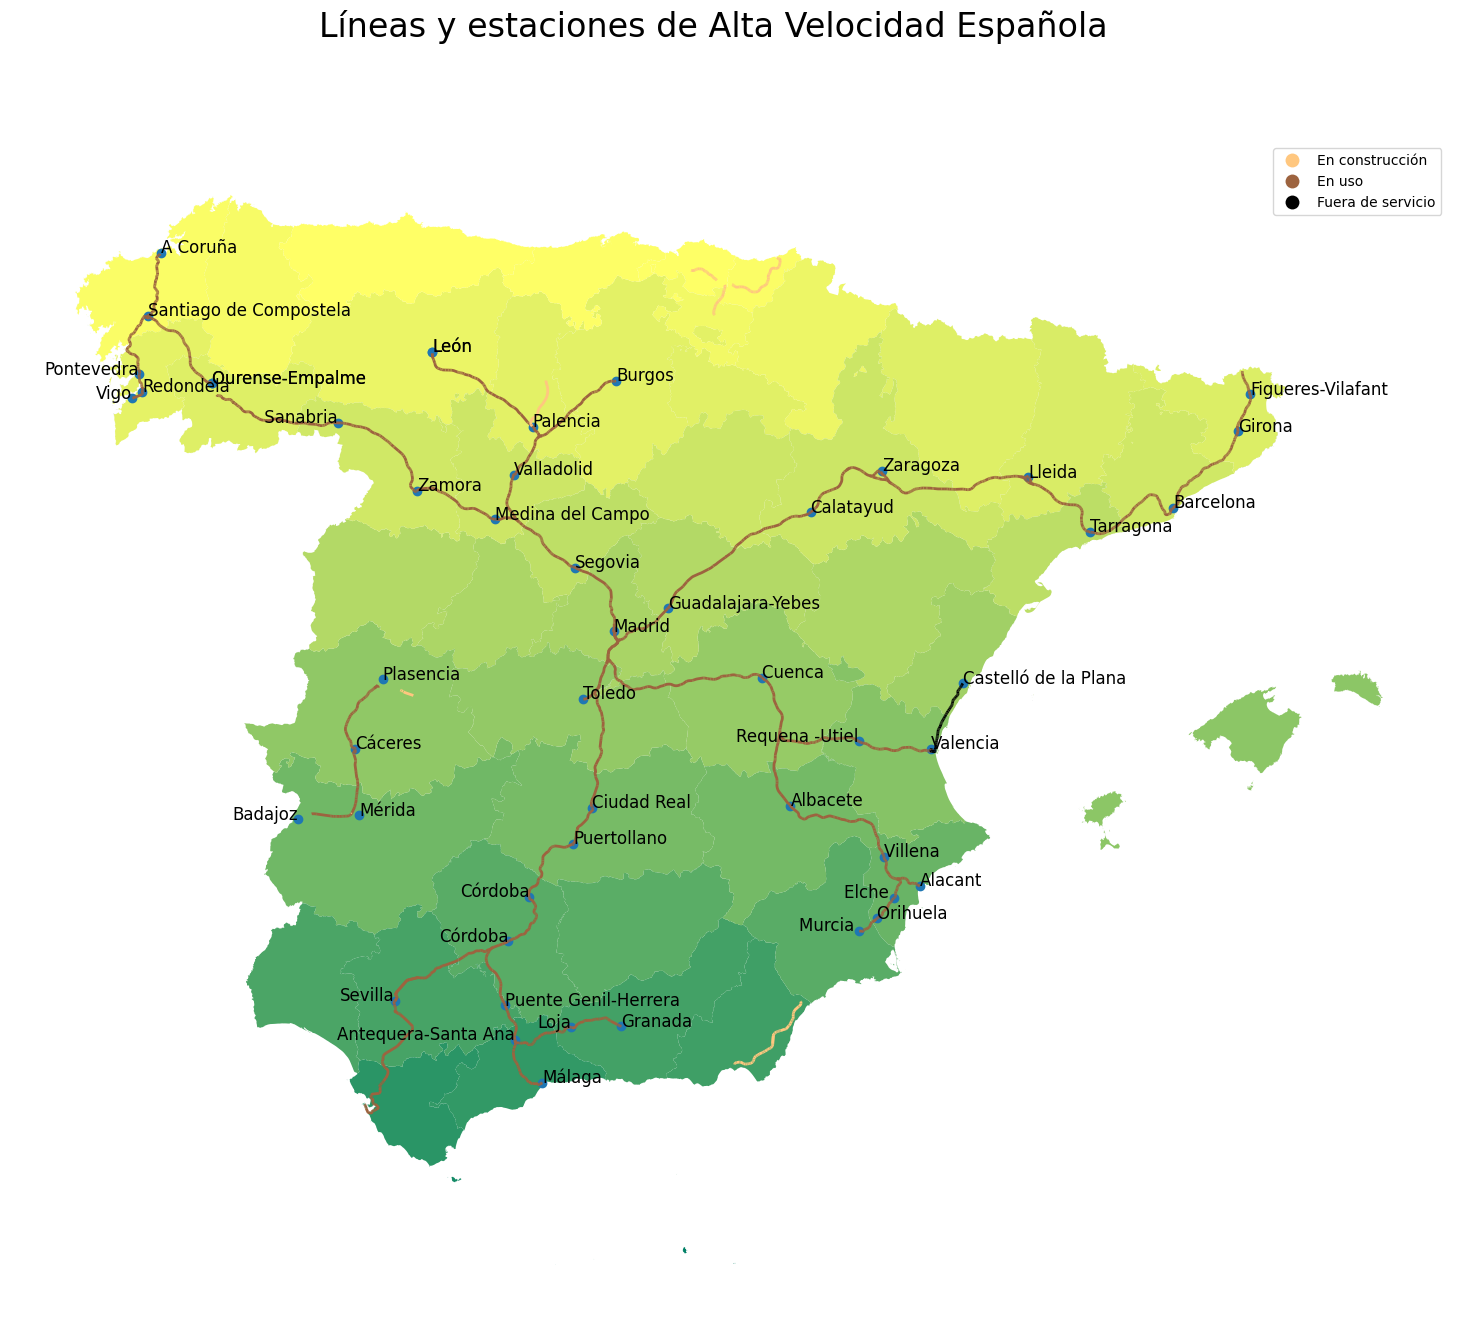

In [709]:
fig, (ax1) = plt.subplots(ncols=1,figsize=(15,15))
ax = provincias.plot(ax = ax1, figsize=(15,15),cmap="summer",column="latitud")
lineas_ave.plot(ax = ax,linewidth=2,column="estadofisD",cmap="copper_r",legend=True)
gfd_estaciones_ave.plot(ax = ax)
gfd_estaciones_ave[gfd_estaciones_ave["nombre"].apply(lambda x: contains_any(x,anotaciones_derecha))].apply(lambda x: ax.annotate(text=sanear_nombre_estacion(x.nombre),
    xy=x.geometry.centroid.coords[0], ha='right',
    fontsize=12),axis=1)
gfd_estaciones_ave[gfd_estaciones_ave["nombre"].apply(lambda x: not contains_any(x,anotaciones_derecha))].apply(lambda x: ax.annotate(text=sanear_nombre_estacion(x.nombre),
    xy=x.geometry.centroid.coords[0], ha='left',
    fontsize=12),axis=1)
fig.tight_layout()
plt.axis("off")
fig.suptitle("Líneas y estaciones de Alta Velocidad Española",fontsize=24)

In [550]:
tramos[(tramos.codigo.str.startswith("036000110"))].nombre

359      600 - VALENCIA-NORD-S.VICENÇ CALDERS
2680     600 - VALENCIA-NORD-S.VICENÇ CALDERS
3139     600 - VALENCIA-NORD-S.VICENÇ CALDERS
4799     600 - VALENCIA-NORD-S.VICENÇ CALDERS
5137     600 - VALENCIA-NORD-S.VICENÇ CALDERS
8052     600 - VALENCIA-NORD-S.VICENÇ CALDERS
9642     600 - VALENCIA-NORD-S.VICENÇ CALDERS
10888    600 - VALENCIA-NORD-S.VICENÇ CALDERS
11147    600 - VALENCIA-NORD-S.VICENÇ CALDERS
12728    600 - VALENCIA-NORD-S.VICENÇ CALDERS
13484    600 - VALENCIA-NORD-S.VICENÇ CALDERS
15984    600 - VALENCIA-NORD-S.VICENÇ CALDERS
16163    600 - VALENCIA-NORD-S.VICENÇ CALDERS
16467    600 - VALENCIA-NORD-S.VICENÇ CALDERS
17365    600 - VALENCIA-NORD-S.VICENÇ CALDERS
17443    600 - VALENCIA-NORD-S.VICENÇ CALDERS
20299    600 - VALENCIA-NORD-S.VICENÇ CALDERS
21317    600 - VALENCIA-NORD-S.VICENÇ CALDERS
22331    600 - VALENCIA-NORD-S.VICENÇ CALDERS
22483    600 - VALENCIA-NORD-S.VICENÇ CALDERS
22933    600 - VALENCIA-NORD-S.VICENÇ CALDERS
23155    600 - VALENCIA-NORD-S.VIC

/home/nacho/Documents/MIARFID/PID/.venv/lib/python3.10/site-packages/shapely/constructive.py:288: RuntimeWarning: invalid value encountered in centroid
  return lib.centroid(geometry, **kwargs)
/home/nacho/Documents/MIARFID/PID/.venv/lib/python3.10/site-packages/shapely/constructive.py:288: RuntimeWarning: invalid value encountered in centroid
  return lib.centroid(geometry, **kwargs)
/home/nacho/Documents/MIARFID/PID/.venv/lib/python3.10/site-packages/shapely/constructive.py:288: RuntimeWarning: invalid value encountered in centroid
  return lib.centroid(geometry, **kwargs)
/home/nacho/Documents/MIARFID/PID/.venv/lib/python3.10/site-packages/shapely/constructive.py:288: RuntimeWarning: invalid value encountered in centroid
  return lib.centroid(geometry, **kwargs)


0            Annotation(77254.3, 4.9512e+06, '-997')
1           Annotation(23253.8, 4.88715e+06, '-998')
2     Annotation(-46057.4, 4.99118e+06, '020002101')
3      Annotation(80385.5, 4.99894e+06, '022100120')
4     Annotation(-86602.1, 4.85388e+06, '026100090')
5     Annotation(-72461.3, 4.83298e+06, '026100100')
6     Annotation(-57603.2, 4.82133e+06, '026100110')
7      Annotation(-43105.7, 4.8058e+06, '026100120')
8       Annotation(-24684, 4.80147e+06, '036000070')
9     Annotation(-16836.2, 4.81559e+06, '036000080')
10    Annotation(-8127.95, 4.83269e+06, '036000090')
11    Annotation(-3418.94, 4.83973e+06, '036000100')
12      Annotation(8103.95, 4.8467e+06, '036000110')
13     Annotation(29886.2, 4.88135e+06, '036000120')
14     Annotation(49301.9, 4.91625e+06, '036000130')
15     Annotation(58377.1, 4.93699e+06, '036000140')
16     Annotation(85524.9, 4.96448e+06, '036000145')
17      Annotation(108360, 4.99114e+06, '036000155')
18      Annotation(119682, 4.99778e+06, '03600

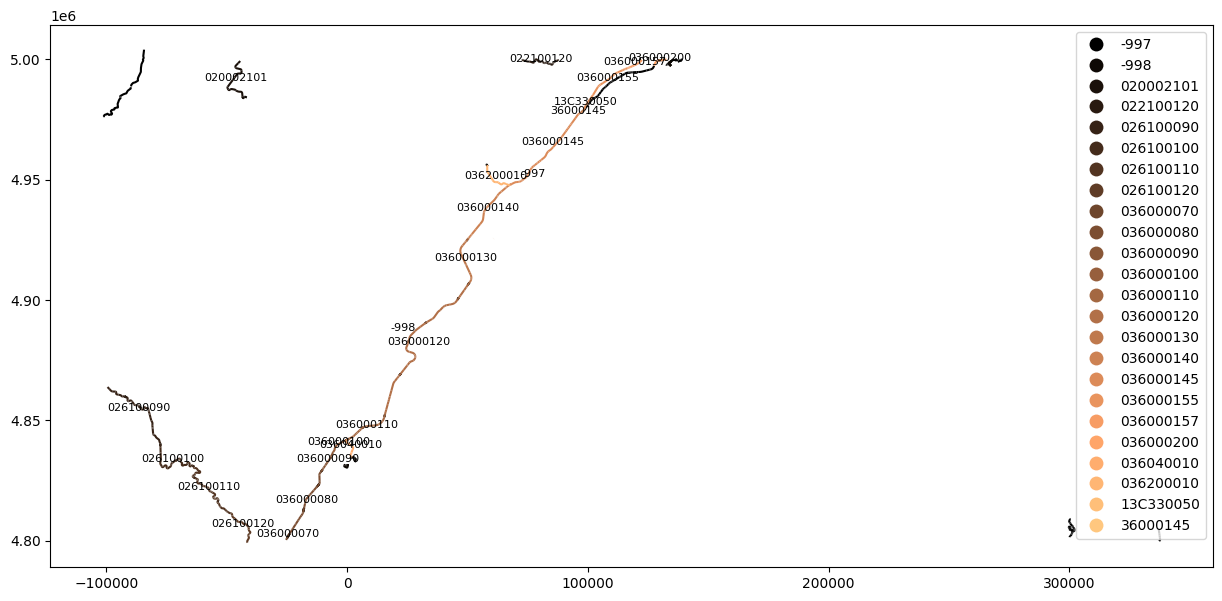

In [549]:
plotted = tramos[tramos.is_valid & (tramos.centroid.y < 5000000)& (tramos.centroid.y > 4800000)& (tramos.centroid.x > -100000)& (tramos.centroid.x < 1000000)].dissolve(by="codigo").reset_index()
ax = plotted.plot(column="codigo",cmap="copper",legend=True,figsize=(15,15))
plotted.apply(lambda x: ax.annotate(text=x.codigo,
xy=x.geometry.centroid.coords[0], ha='center',
fontsize=8),axis=1)

0     Annotation(-42217.5, 4.76066e+06, '036000005')
1     Annotation(-42539.5, 4.75931e+06, '036000007')
2     Annotation(-42108.3, 4.75818e+06, '036000009')
3     Annotation(-40549.3, 4.75782e+06, '036000017')
4     Annotation(-40166.9, 4.75781e+06, '036000020')
5      Annotation(-39517.6, 4.7577e+06, '036000027')
6      Annotation(-38469.1, 4.7577e+06, '036000035')
7     Annotation(-35975.9, 4.77085e+06, '036000040')
8     Annotation(-32034.9, 4.78705e+06, '036000050')
9     Annotation(-30480.6, 4.79111e+06, '036000060')
10     Annotation(-27139.8, 4.7971e+06, '036000070')
11    Annotation(-16836.2, 4.81559e+06, '036000080')
12    Annotation(-8127.95, 4.83269e+06, '036000090')
dtype: object

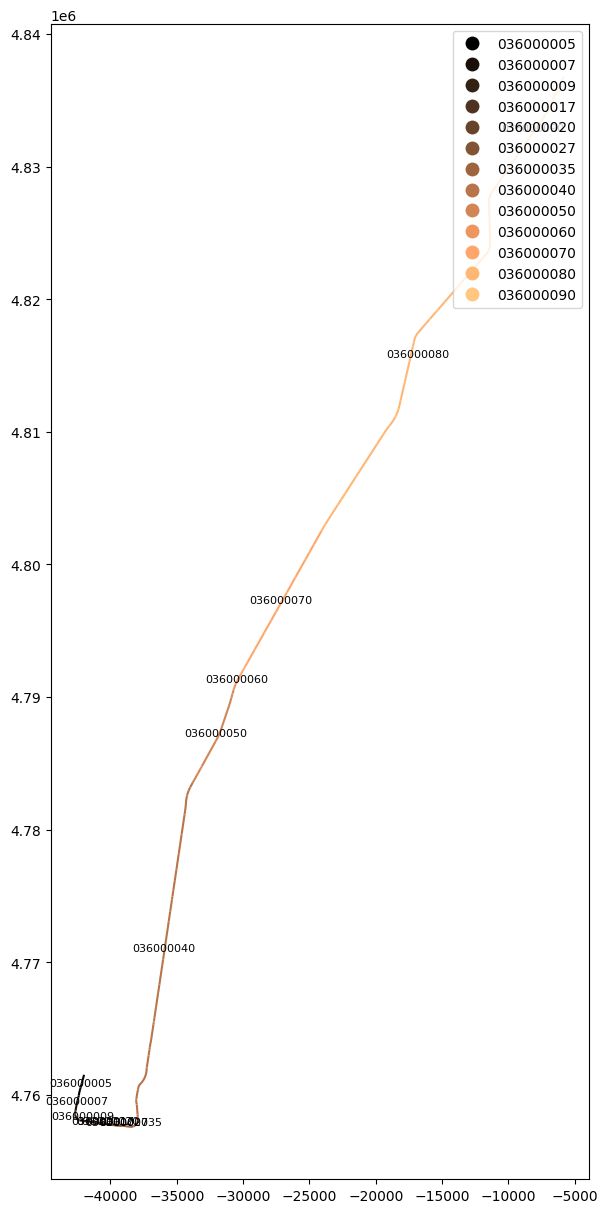

In [555]:
plotted = tramos[(tramos.codigo.str.startswith("0360000"))].dissolve(by="codigo").reset_index()
ax = plotted.plot(column="codigo",cmap="copper",legend=True,figsize=(15,15))
plotted.apply(lambda x: ax.annotate(text=x.codigo,
xy=x.geometry.centroid.coords[0], ha='center',
fontsize=8),axis=1)